In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Load Iris Dataset

In [252]:
iris = load_iris()

Convert the data into dataframe using pandas.

In [253]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Rename the columns for better understanding.

In [254]:
df.rename(columns = {0:'sepal_length',1:'sepal_width',2:'petal_length',3:'petal_width'},inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Adding a column target for getting result.

In [255]:
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Data Exploration starts.*italicized text*

In [256]:
df.groupby('target').agg('count')

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


Checking Null values

In [257]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

Getting information from data

In [258]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


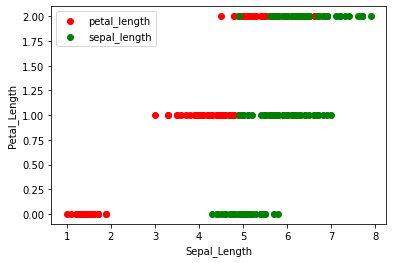

In [305]:
plt.xlabel('Sepal_Length')
plt.ylabel('Petal_Length')
plt.scatter(df.petal_length, df.target,  color = 'red')
plt.scatter(df.sepal_length, df.target,  color = 'green')
plt.legend(['petal_length','sepal_length'])

didn't get much information

Getting Correlation matrix

In [259]:
corr_matrix = df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [260]:
corr_matrix['target'].sort_values(ascending = False)

target          1.000000
petal_width     0.956547
petal_length    0.949035
sepal_length    0.782561
sepal_width    -0.426658
Name: target, dtype: float64

Adding area column of sepal and petal for much more information.

In [272]:
df['petal_area'] = df.petal_length*df.petal_width
df['sepal_area'] = df.sepal_length*df.sepal_width
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending = False)

target          1.000000
petal_width     0.956547
petal_area      0.950123
petal_length    0.949035
sepal_length    0.782561
sepal_area      0.295687
sepal_width    -0.426658
Name: target, dtype: float64

Plotting the area graph of sepal with respect to petal of each flower

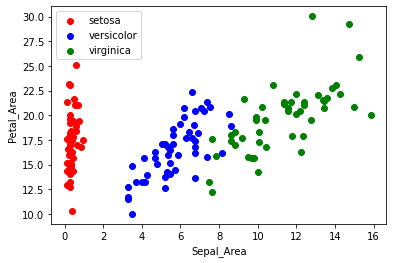

In [304]:
plt.xlabel('Sepal_Area')
plt.ylabel('Petal_Area')
plt.scatter(df.petal_area[df.target == 0],df.sepal_area[df.target == 0], color = 'red')
plt.scatter(df.petal_area[df.target == 1],df.sepal_area[df.target == 1], color = 'blue')
plt.scatter(df.petal_area[df.target == 2],df.sepal_area[df.target == 2], color = 'green')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

Making input and target attributes for splitting the training and testing data.

In [283]:
x = df.drop(['target', 'petal_area', 'sepal_area'], axis = 'columns')
y = df.target

Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size)

Function to check the best model for traing our dataset.Currently two model types are used we can use as many as we can.

In [284]:
def check(model,x_train,y_train,x_test,y_test):
  for model in model:
    (model.fit(x_train, y_train))
    print( model.score(x_test, y_test))

Checking the best model

In [285]:
model = [LinearRegression(), LogisticRegression()]
check(model,x_train,y_train,x_test,y_test)

-3.6934575652715024e+20
0.9217857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using that model to train our data.

In [286]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Getting Accuracy of the trained data on test data.

In [287]:
model.score(x_test,y_test)

0.9217857142857143

92 % Accuracy.